### 90. word2vecによる学習
81で作成したコーパスに対してword2vecを適用し，単語ベクトルを学習せよ．さらに，学習した単語ベクトルの形式を変換し，86-89のプログラムを動かせ．

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import word2vec

In [3]:
word2vec.word2vec('data/large_files/file81', 'data/large_files/file90.bin', size=300, verbose=True)

Starting training using file data/large_files/file81
Vocab size: 359623
Words in train file: 120739174


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
model = word2vec.load('data/large_files/file90.bin')

#### 86

In [5]:
US = model['United_States']

#### 87

In [6]:
US2 = model['U.S']

In [59]:
import numpy as np

In [60]:
def cos_sim(a, b):
    return a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [9]:
print(cos_sim(US, US2))

0.8500974991431878


#### 88

In [10]:
England = model['England']

In [11]:
englands = []
for t in model.vocab:
    if t == 'England':
        continue
    cs = cos_sim(model[t], England)
    if cs > 0.5:
        englands.append((t, cs))

In [12]:
sorted(englands, key = lambda i: i[1], reverse = True)[:10]

[('Scotland', 0.7239970363094319),
 ('Britain', 0.622763763624713),
 ('Wales', 0.6225725204498795),
 ('Hampshire', 0.6111906189848892),
 ("England's", 0.5920094221945283),
 ('France', 0.5860924404965795),
 ('Ireland', 0.5851621586447119),
 ('Cornwall', 0.5699114825808649),
 ('Worcestershire', 0.5655497744101684),
 ('Warwickshire', 0.5546665025181954)]

#### 89

In [13]:
vec89 = model['Spain'] - model['Madrid'] + model['Athens']

In [14]:
lst89 = []
for t in model.vocab:
    cs = cos_sim(model[t], vec89)
    if cs > 0.5:
        lst89.append((t, cs))

In [15]:
sorted(lst89, key = lambda i: i[1], reverse = True)[:10]

[('Athens', 0.7432972378040887),
 ('Greece', 0.6831500910192306),
 ('Crete', 0.618631000482238),
 ('Persia', 0.5867094738787523),
 ('Gaul', 0.5739131823108669),
 ('Spain', 0.5718758689011599),
 ('Egypt', 0.5710531267339155),
 ('Byzantium', 0.5681749344394931),
 ('Sicily', 0.556832843759318),
 ('Iberia', 0.5444106507931947)]

### 91. アナロジーデータの準備
単語アナロジーの評価データをダウンロードせよ．このデータ中で": "で始まる行はセクション名を表す．例えば，": capital-common-countries"という行は，"capital-common-countries"というセクションの開始を表している．ダウンロードした評価データの中で，"family"というセクションに含まれる評価事例を抜き出してファイルに保存せよ．

In [16]:
with open('data/file91', 'w'):
    pass
with open('data/questions-words.txt')as r, open('data/file91', 'a')as a:
    family = False
    for line in r:
        if line == ': family\n':
            family = True
        elif (family and line[0] == ':'):
            break
        elif family:
            a.write(line)

### 92. アナロジーデータへの適用
91で作成した評価データの各事例に対して，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

In [22]:
T = np.load('data/large_files/file85.npy')

ts=[]
tmp=''
for line in open('data/large_files/file84'):
    t, _, _ = line.split()
    if t != tmp:
        ts.append(t)
        tmp = t

t_to_number = {}
for i, t in enumerate(ts):
    t_to_number.update({t : i})

#### 85

In [26]:
with open('data/file92', 'w'):
    pass
with open('data/file92', 'a')as a, open('data/file91')as r:
    for line in r:
        t1, t2, t3, t4 = line.split()
        try:
            vec = T[t_to_number[t2]] - T[t_to_number[t1]] + T[t_to_number[t3]]
        except KeyError:
            continue
        answer = ''
        similarity = 0
        for t in t_to_number:
            cos = cos_sim(T[t_to_number[t]], vec)
            if similarity < cos:
                answer = t
                similarity = cos
        a.write(' '.join([t1, t2, t3, t4, answer, str(similarity), '\n']))

#### 90

In [28]:
with open('data/file92b', 'w'):
    pass
with open('data/file92b', 'a')as a, open('data/file91')as r:
    for line in r:
        t1, t2, t3, t4 = line.split()
        try:
            vec = model[t2] - model[t1] + model[t3]
        except KeyError:
            continue
        answer = ''
        similarity = 0
        for t in model.vocab:
            cos = cos_sim(model[t], vec)
            if similarity < cos:
                answer = t
                similarity = cos
        a.write(' '.join([t1, t2, t3, t4, answer, str(similarity), '\n']))

### 93. アナロジータスクの正解率の計算
92で作ったデータを用い，各モデルのアナロジータスクの正解率を求めよ．

In [30]:
success = 0
failure = 0
for line in open('data/file92'):
    _, _, _, t4, t5, _ = line.split()
    if t4 == t5:
        success = success + 1
    else:
        failure = failure + 1
print(success/(success + failure))

0.05627705627705628


In [31]:
success = 0
failure = 0
for line in open('data/file92b'):
    _, _, _, t4, t5, _ = line.split()
    if t4 == t5:
        success = success + 1
    else:
        failure = failure + 1
print(success/(success + failure))

0.19367588932806323


### 94. WordSimilarity-353での類似度計算
The WordSimilarity-353 Test Collectionの評価データを入力とし，1列目と2列目の単語の類似度を計算し，各行の末尾に類似度の値を追加するプログラムを作成せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

#### 85

In [35]:
with open('data/file94', 'w'):
    pass
first = True
with open('data/wordsim353/combined.tab')as r, open('data/file94', 'a')as a:
    for line in r:
        if first:
            first = False
            continue
        t1, t2, t3 = line.split()
        try:
            cos = cos_sim(T[t_to_number[t1]], T[t_to_number[t2]])
        except KeyError:
            continue
        a.write(' '.join([t1, t2, t3, str(cos), '\n']))

#### 90

In [36]:
with open('data/file94b', 'w'):
    pass
first = True
with open('data/wordsim353/combined.tab')as r, open('data/file94b', 'a')as a:
    for line in r:
        if first:
            first = False
            continue
        t1, t2, t3 = line.split()
        try:
            cos = cos_sim(model[t1], model[t2])
        except KeyError:
            continue
        a.write(' '.join([t1, t2, t3, str(cos), '\n']))

### 95. WordSimilarity-353での評価
94で作ったデータを用い，各モデルが出力する類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

#### 85

In [55]:
with open('data/wordsim353/combined.tab')as r:
    lst_WS = r.readlines()
    lst_WS = [i.split()[:2] for i in sorted(lst_WS[1:], key = lambda j: float(j.split()[2]), reverse = True)]
with open('data/file94')as r:
    lst_94 = r.readlines()
    lst_94 = [i.split()[:2] for i in sorted(lst_94, key = lambda j: float(j.split()[3]), reverse = True)]
with open('data/file94b')as r:
    lst_94b = r.readlines()
    lst_94b = [i.split()[:2] for i in sorted(lst_94b, key = lambda j: float(j.split()[3]), reverse = True)]

In [60]:
len(lst_94)

352

In [61]:
len(lst_94b)

353

In [62]:
len(lst_WS)

353

In [68]:
for i in lst_WS:
    if not i in lst_94:
        print(i)

['asylum', 'madhouse']


↑だけlst_94にないので注意

In [66]:
for i in lst_94:
    if lst_94.index(i) == lst_WS.index(i):
        print(i)

['tiger', 'tiger']
['planet', 'sun']
['drink', 'mouth']
['population', 'development']
['production', 'hike']


↑順位が同じものが5個あるが無視する

#### 85

In [77]:
lst = [i for i in lst_WS if i in lst_94]
n = len(lst_94)
ro = 1 - (6 * sum([abs(lst_94.index(i) - lst.index(i)) for i in lst_94]) )/(n**3 - n)
print(ro)

0.9964728181796171


#### 90

In [78]:
n = len(lst_94b)
ro = 1 - (6 * sum([abs(lst_94b.index(i) - lst_WS.index(i)) for i in lst_94]) )/(n**3 - n)
print(ro)

0.9970084996748102


 ### 96. 国名に関するベクトルの抽出
word2vecの学習結果から，国名に関するベクトルのみを抜き出せ．

In [5]:
import pycountry
countries = list(pycountry.countries)

In [6]:
def error(i):
    try:
        i.official_name
        return False
    except:
        return True
    
country_names = [i.name.replace(' ', '_').strip('.,!?;:()[]\'\"') for i in countries] + [i.official_name.replace(' ', '_').strip('.,!?;:()[]\'\"') for i in countries if not error(i)]

In [7]:
vec96 = {}
for name in country_names:
    try:
        vec96.update({name : model[name]})
    except:
        continue

### 97. k-meansクラスタリング
96の単語ベクトルに対して，k-meansクラスタリングをクラスタ数k=5
として実行せよ．

In [61]:
clust = [{}, {}, {}, {}, {}]
center = [0, 0, 0, 0, 0]
for i, t in enumerate(vec96):
    clust[i % 5].update({t : vec96[t]})
for _ in range(1000):
    for i in range(5):
        center[i] = np.average(np.array(list(clust[i].values())), axis=0)
    clust = [{}, {}, {}, {}, {}]
    for t in vec96:
        d = 0
        num = 0
        for i, v in enumerate(center):
            cs = cos_sim(vec96[t], v)
            if cs > d:
                d = cs
                num = i
        clust[num].update({t : vec96[t]})

In [160]:
clust[3].keys()

dict_keys(['Aruba', 'Anguilla', 'American_Samoa', 'Antarctica', 'Antigua_and_Barbuda', 'Bahamas', 'Belize', 'Bermuda', 'Barbados', 'Cook_Islands', 'Comoros', 'Cabo_Verde', 'Costa_Rica', 'Cuba', 'Curaçao', 'Christmas_Island', 'Cayman_Islands', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Fiji', 'Faroe_Islands', 'Guernsey', 'Gibraltar', 'Guinea', 'Guadeloupe', 'Gambia', 'Guinea-Bissau', 'Grenada', 'Greenland', 'Guatemala', 'French_Guiana', 'Guam', 'Guyana', 'Hong_Kong', 'Honduras', 'Haiti', 'Isle_of_Man', 'Jamaica', 'Jersey', 'Kiribati', 'Saint_Kitts_and_Nevis', 'Saint_Lucia', 'Macao', 'Madagascar', 'Maldives', 'Marshall_Islands', 'Malta', 'Northern_Mariana_Islands', 'Montserrat', 'Martinique', 'Mauritius', 'Mayotte', 'New_Caledonia', 'Norfolk_Island', 'Nicaragua', 'Niue', 'Nauru', 'New_Zealand', 'Panama', 'Pitcairn', 'Peru', 'Philippines', 'Palau', 'Papua_New_Guinea', 'Puerto_Rico', 'French_Polynesia', 'Réunion', 'Singapore', 'Svalbard_and_Jan_Mayen', 'Solomon_Islands', 'El_Salvador',

### 98. Ward法によるクラスタリング
96の単語ベクトルに対して，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [161]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

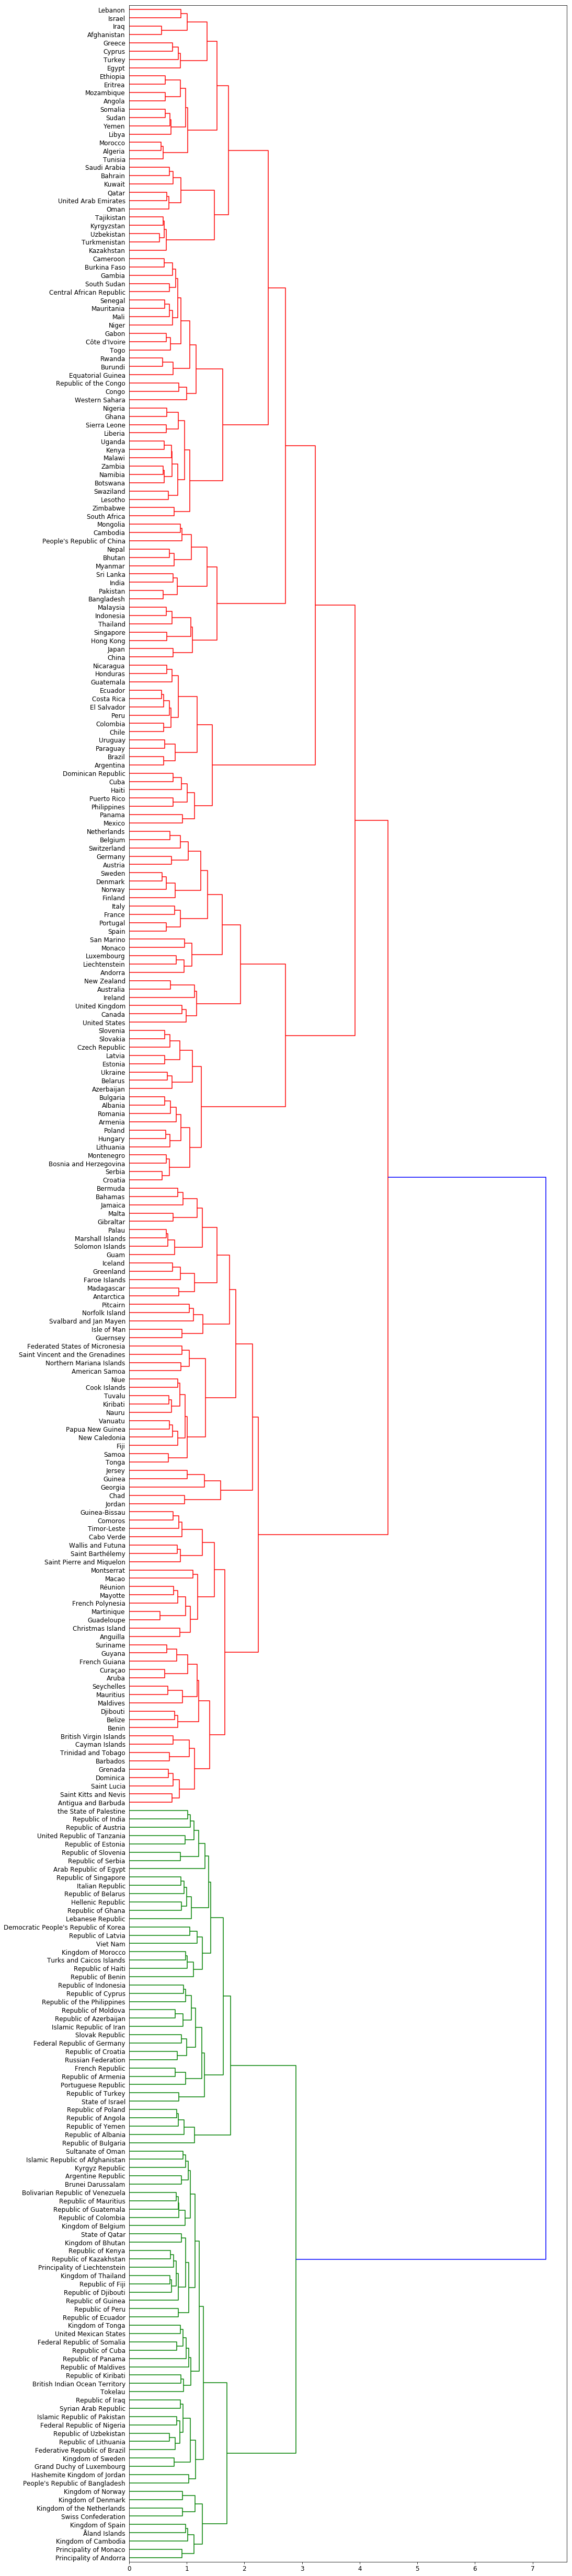

In [190]:
X = list(vec96.values())
Z = linkage(X, 'ward')
fig, axes = plt.subplots(1, figsize=(15, 90))
dendrogram(Z, orientation='right', labels=[i.replace('_', ' ') for i in list(vec96)] )
plt.tick_params(labelsize=12)
plt.show()

### 99. t-SNEによる可視化
96の単語ベクトルに対して，ベクトル空間をt-SNEで可視化せよ．

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [74]:
X = TSNE(n_components=2, random_state=0, learning_rate=800).fit_transform(np.array(list(vec96.values())))

97のクラスタで色分けしてみる

In [78]:
%matplotlib notebook

<IPython.core.display.Javascript object>


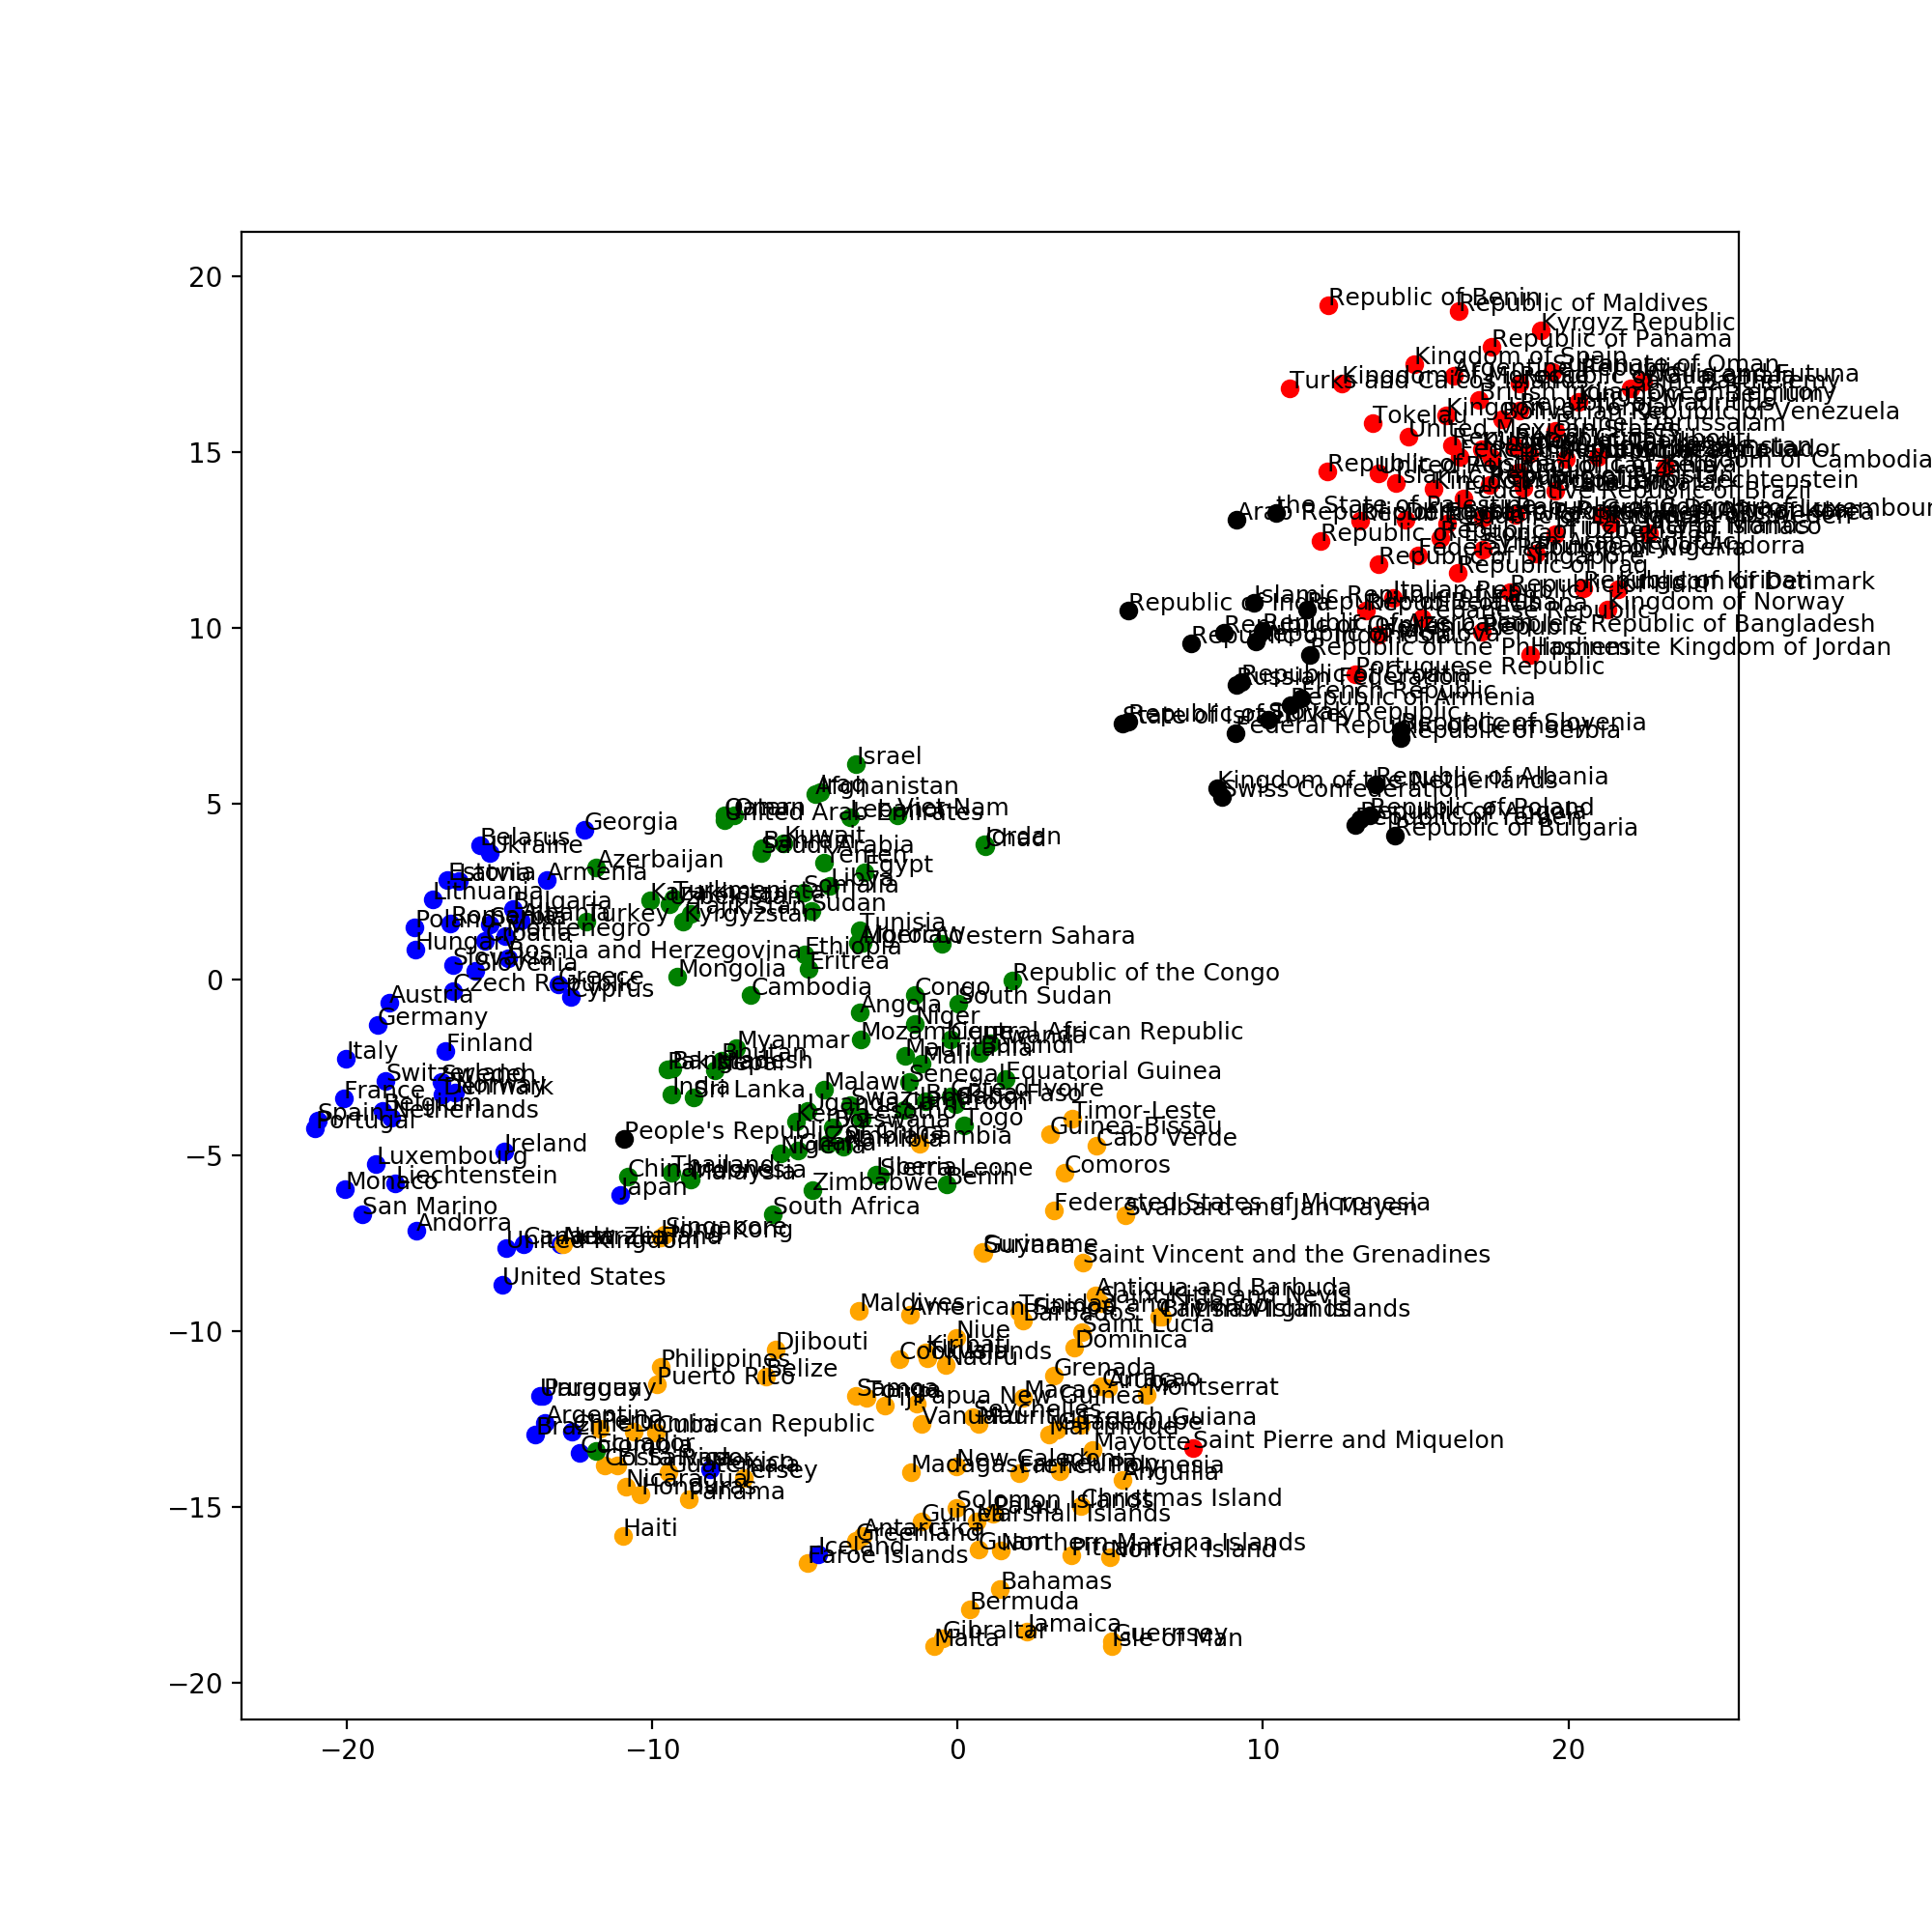

In [81]:
plt.subplots(1, figsize=(10, 10))
lst = list(vec96.keys())

color = ['red', 'blue', 'green', 'orange', 'black']
for i in lst:
    plt.annotate(i.replace('_', ' '), (X[lst.index(i),0], X[lst.index(i),1]), fontsize=9)
    n = 0
    for num in range(5):
        if i in clust[num]:
            n = num
    plt.scatter(X[lst.index(i),0], X[lst.index(i),1], marker='o', c=color[n])
plt.show()